#  Описание работы

## Задания
* Придумать, что делать с пропущенными отсчётами:
    1. [Теорема Котельникова](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%9A%D0%BE%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2%D0%B0)
* Оптимизировать работу кода, задейстовав все возможные потоки процессора - [параллельное программирование](https://www.youtube.com/watch?v=fKl2JW_qrso&list=RDCMUCCezIgC97PvUuR4_gbFUs5g&start_radio=1&rv=fKl2JW_qrso&t=28)
* Проверить корректность работы ЕМ-алгоритма:
    * В окне довожу ЕМ до точности $\varepsilon$. Не сдвигая окно запускаю ЕМ ещё раз, но с новыми начальными приближениями. Так делаю 10 раз, сохраняя информацию о нач. прибл-ях. Добавляю 11-ым набором предпоследние, 10-ые, начальные приближения с последнего окна и выбираю тот набор, который максимизирует функцию правдоподобия. Результат - более точная (уверенная) максимизация функции правдоподобия (более точное разделение смесей).   
* Построить 3D горы для смесей.

1. Первая стадия 
    * Данные по одной координате разделить на смеси в окне, считая что имеется __6__ нормальных законов. Суммарно получается 18-ть дополнительных массивов: мат. ож-е, ср. кв. откл. и веса для каждого закона.
    * Визуализировать полученные массивы (придумать как). Можно через составляющие валатильности и тренд.
    * В каждом окне считается энтропия $H = -\sum_{i=1}^{6} p_i \cdot \log{p_i}$
    
2. Далее разбиваемся на группы: построение многомерного ЕМ и изучения всплесков, их вер-ти.

## Информация от физиков

### Письмо

Пересылаю запрошенный в конце прошедшей недели набор файлов за 2023 год, включающий:
именования столбцов регистрируемых параметров + трехмесячные файлы изображения временных разверток + листинги этих разверток. __Период опроса__ -- 1 минута. Предобработка по ограничению уровня и скорости вариации индукции магнитиного поля. В сумме -- около 2.000.000 выборок. Кажущиеся дефекты с октября 2023 года соответствуют процессу предфильтрации, через месяц они исчезнут. Формат содержит только актуальные данные, необходимые для реконструкции.

Для проверочных кодов будем использовать четыре __синтетических__ параметра: SYM_H, ASYM_H, SYM_D, ASYM_D.







## Замечания






* Один и тот же файл выдают за разный - `omni_min_def_20230401_20230630.lst` и `omni_min_def_20230101_20230331.lst`. Это данные за Январь-Март-2023 и Апрель-Июнь-2023. Судя по всему потеряна именно информация со второго периода, так как значения переменной 'Day'.
* В данных за октябрь полностью отсутсвуют синтетические параметры. Да и в принципе мало данных за этот месяц.
* EM-алгоритм выдает пропуски на графиках в связи с тем, что на каком-то номере итерации среднеквадрат-е откл-е $\sigma$ становится равным нулю. Что превращает веса с индексами соответсвующими $\sigma_k=0$ на следующей итерации в неопределённые значения `nan`
1. Новый ЕМ дает много скачков из-за того, что сваливается не в те разные локальные минимумы (пере/недо-обучение, если можно так сказать). Чтобы поптаться это исправить, нужно в ЕМ отправлять значения параметров из предыдущего окна вместе с новыми, случайно-сгенерированными параметрами $\mu,\sigma,p$

### Памятка


* Не забывай при существенном изменении кода создавать новые ветки и работать на них.
* https://numpy.org/devdocs/user/basics.types.html - number types.
* https://plotly.com/python/3d-charts/ - plotly 3D
* https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html - plotly histogram
* https://plotly.com/python/reference/layout/#layout-title - plotly fig layout
* https://coolors.co/092327-0b5351-00a9a5-4e8098-90c2e7 - генератор политры цвета.

# Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import os

import histplot as hp # Персональный модуль визуализации
import essentials as es # Персональный модуль основных алгоритмов


# Позволяет использовать измененные модули без перезагрузки ядра
%load_ext autoreload
%autoreload 2

# Позволяет выводит графики в ячейках
%matplotlib inline

# Путь к папке с данными
PATH_DATA = os.getcwd() + '/Data/'

# Указание типов для упрощения считывания данных из *.csv файлов
TYPES = dtypes = {
    'Year': int, # str на самом деле, просто с int удобнее работать
    'Day': int, # str
    'Hour': int, # str
    'Minute': int, # str
    'BX': float,
    'BY': float,
    'BZ': float,
    'Vx_Velocity': float,
    'Vy_Velocity': float,
    'Vz_Velocity': float,
    'SYM/D': int,
    'SYM/H': int,
    'ASY/D': int,
    'ASY/H': int }

# os.listdir(PATH_DATA) # выводит содержимое папки, лежащей по пути 'PATH_DATA'

# Считываени данных
# df1 = pd.read_csv(PATH_DATA + "january_march.csv", dtype=TYPES)
# df2 = pd.read_csv(PATH_DATA + "april_jun.csv", dtype=TYPES)
# df3 = pd.read_csv(PATH_DATA + "july_september.csv", dtype=TYPES)
# df4 = pd.read_csv(PATH_DATA + "october.csv")
# df = pd.read_csv(PATH_DATA + "FULL_DATA.csv")

data_clean = pd.read_csv(PATH_DATA + "dropna_january_march.csv", dtype=TYPES)



In [2]:
from converter import time_related_id
time_related_id(data_clean)

# Обработка периода Январь-Март

В связи упомянутым замечанием про отсутсвие данных с периода Февраль-Июнь и построенным графиком всех данных, анализ данных будет осуществляться на подвыборке Январь-Март

## Визуализация данных

### Временные ряды и их гистограммы

In [ ]:
custom_title_drop = "Пропуски \"склеены\"."
custom_xaxis = data_clean['ydhm_id']
hp.show_genral_info(data_clean['BX'], add_title=custom_title_drop, add_xaxis=custom_xaxis)

In [ ]:
data_clean

Комментарии:
1. Склеенные данные не выглядят сплошными из-за равномерности сетки по времени. На самом деле в "дырках" отсчетов нет

### 3D гистограммы временных рядов

In [ ]:
clean_hist_3D = es.construct_hist3D(data_clean['BX'], window_size=4000, step=100)

hp.movable3D_hist(clean_hist_3D)

clean_BX_3D_0_3000_30 = es.construct_hist3D(data_clean['BX'][:3000], step=30)
clean_BY_3D_0_3000_30 = es.construct_hist3D(data_clean['BY'][:3000], step=30)
clean_BZ_3D_0_3000_30 = es.construct_hist3D(data_clean['BZ'][:3000], step=30)

hp.movable3D_hist(clean_BX_3D_0_3000_30)
hp.movable3D_hist(clean_BY_3D_0_3000_30)
hp.movable3D_hist(clean_BZ_3D_0_3000_30)

# ЕМ-алгоритм

* __Е-этап__
    1. Calculate unnormalized responsibilities: 
    $$
    \normalsize{ \quad \tilde\rho_k^{[i]} = \pi_k \cdot \frac{1}{\sigma_k \sqrt{2\pi}} \cdot \exp{\left(-\frac{(x^{[i]} - \mu_k)^2}{2\sigma^2}\right)} \equiv
    \pi_k \cdot \frac{1}{\sigma_k} \cdot \varphi \left(\frac{x^{[i]} - \mu_k}{2\sigma} \right) }
    $$
    2. Normilize responsibilities: 
    $$
    \normalsize{ \quad \rho_k^{[i]} = \frac{\tilde\rho_k^{[i]}}{\sum_{k=0}^{M-1} \tilde\rho_k^{[i]}} }
    $$
    3. Calculate class responsibilities: 
    $$
    \normalsize{ \quad \gamma_k = \sum_{i=0}^{N-1} \rho_k^{[i]} }
    $$
* __М-этап__
    1. Update the class probabilities: 
    $$
    \normalsize{ \quad \pi_k = \frac{\quad \gamma_k}{N} }
    $$
    2. Update the math. expectations: 
    $$
    \normalsize{ \quad \mu_k = \frac{1}{\gamma_k} \cdot \sum_{i=0}^{N-1} \rho_k^{[i]}x^{[i]} }
    $$
    3. Update the standard deviations:
    $$
    \normalsize{ \quad \sigma_k = \sqrt{\frac{1}{\gamma_k} \cdot \sum_{i=0}^{N-1} \rho_k^{[i]}\left(x^{[i]} - \mu_k \right)^2} }
    $$

## Реализация алгоритма

### Код для проверки корректности работы реализованного ЕМ-алгоритма

## Применение к склеиным данным.

In [ ]:
random_seed = 42 # for reproducability
n_iterations = 42
n_classes = 6
clean_mix_dicts = []
for n_classes in range(1,11):
    class_probs, mus, sigmas = es.EM(data_clean['BX'].values,
                                     n_classes, 
                                     n_iterations,
                                     random_seed)
    param = {}
    param.update({"class_probs": class_probs,
                  "mus" : mus,
                  "sigmas" : sigmas})
    clean_mix_dicts.append(param)
    print(f"Вероятности классов: {class_probs}")
    print(f"Мат. ожидания: {mus}")
    print(f"Ср. кв. отклонение: {sigmas}\n")

In [15]:
import silence_tensorflow.auto
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from scipy.special import logsumexp
import matplotlib.pyplot as plt

from tqdm import tqdm # progress-meter

class_probs_true = [0.5, 0.4, 0.1]
mus_true = [2.5, 4.8, 3]
sigmas_true = [0.6, 0.3, 0.15]

random_seed = 42 # for reproducability
n_samples = 10000

n_iterations_pre_sieving = 10**(-2) #epsilon
n_candidates = 100
n_iterations_post_sieving = 100**(-2)
n_chosen_ones = 5
n_classes = 3

# generate the data
univariate_gmm = tfp.distributions.MixtureSameFamily(
    mixture_distribution=tfp.distributions.Categorical(probs=class_probs_true),
    components_distribution=tfp.distributions.Normal(
        loc=mus_true,
        scale=sigmas_true,
    )
)

dataset = univariate_gmm.sample(n_samples, seed=random_seed).numpy()

for i in range(10):
    dataset = univariate_gmm.sample(n_samples, seed=random_seed).numpy()
    class_probs, mus, sigmas, log_likelihood_histories = es.EM_sieved(
        dataset,
        n_classes,
        n_iterations_pre_sieving,
        n_candidates,
        n_iterations_post_sieving,
        n_chosen_ones,
        random_seed,
    ) 

    print(class_probs)
    print(mus)
    print(sigmas)
    print("---")

/home/oplora/Documents/VMK/Dissertation/Magfield/essentials.py:236: RuntimeWarning: invalid value encountered in divide
  mus = np.sum(responsibilities * dataset.reshape(-1, 1), axis=0) / class_responsibilities
/home/oplora/Documents/VMK/Dissertation/Magfield/essentials.py:252: RuntimeWarning: divide by zero encountered in log
  np.log(class_probs)


[0.09309574759541553, 0.39502811753279055, 0.5118761348717915]
[2.987899745172498, 4.799562247293007, 2.517959237218261]
[0.16235519118147806, 0.2994688948994481, 0.6061972387615572]
---
[0.10443187398094235, 0.407553219760997, 0.48801490625806043]
[3.0173028033703875, 4.788200059164764, 2.4996351253591094]
[0.15718379758741674, 0.3026675098565712, 0.5804195126873372]
---
[0.09451100088136949, 0.396335754464619, 0.5091532446540115]
[2.9913973877494104, 4.8071710545158455, 2.5043156739846704]
[0.13484551864559838, 0.29757458906617634, 0.6024785436853867]
---
[0.09448014127109795, 0.39988176525589936, 0.5056380934730007]
[3.0025248461674745, 4.795028174280876, 2.4865117302477615]
[0.1535836317521609, 0.2934201961913244, 0.589202236129068]
---
[0.10687226868834995, 0.4027769888822558, 0.4903507424293927]
[2.998647630029858, 4.7946680926020635, 2.4967602676693432]
[0.1511719714963706, 0.3020777680337636, 0.5934209245694894]
---
[0.11272590553185233, 0.39657961003613057, 0.4906944844320149]

In [14]:
# Исходные массивы
list1 = [3, 1, 2]
list2 = [9, 8, 7]
list3 = [6, 5, 4]

# Сортировка первого списка и получение индексов перестановки
sorted_indices = sorted(range(len(list1)), key=lambda k: list1[k])
sorted_list1 = [list1[i] for i in sorted_indices]
sorted_list2 = [list2[i] for i in sorted_indices]
sorted_list3 = [list3[i] for i in sorted_indices]

# Вывод отсортированных списков
print("Отсортированный list1:", sorted_list1)
print("Отсортированный list2:", sorted_list2)
print("Отсортированный list3:", sorted_list3)

Отсортированный list1: [1, 2, 3]
Отсортированный list2: [8, 7, 9]
Отсортированный list3: [5, 4, 6]


In [156]:
log_likelihood_histories

array([[-12820.23822642, -12819.97512731, -12819.94878361,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [-12820.45794011, -12819.99683226, -12819.9509788 ,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [-14619.35956796, -14295.56410877, -13913.75667348,
        -13443.70259569, -13018.8369352 , -12846.70984013,
        -12822.40847412, -12820.18380131, -12819.96971546,
        -12819.94823524],
       [-12820.88619488, -12820.03863154, -12819.95519147,
        -12819.94676097,             nan,             nan,
                    nan,             nan,             nan,
                    nan],
       [-16252.44486208,             nan,             nan,
                    nan,             nan,             nan,
                    nan,             nan,             nan,
           

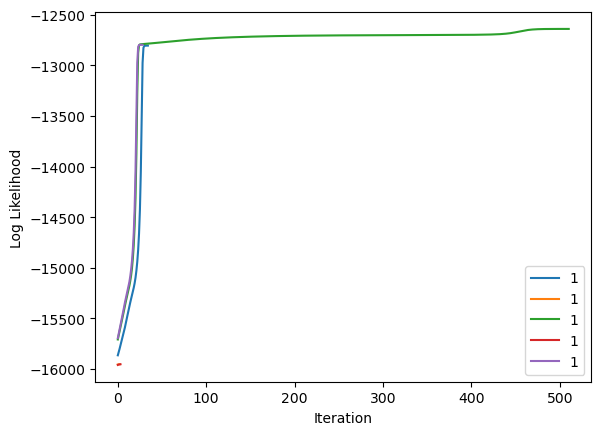

In [18]:
import matplotlib.pyplot as plt

plt.figure()
for log_likelihood_history in log_likelihood_histories:
    plt.plot(log_likelihood_history, label=1)
plt.xlabel("Iteration")
plt.ylabel("Log Likelihood")
plt.legend()
plt.show()

In [98]:
log_likelihood_histories

array([[-224265.57350613, -223764.23661206, -223293.30344916, ...,
                     nan,              nan,              nan],
       [-224743.61513361, -224345.53625383, -223934.44746712, ...,
                     nan,              nan,              nan],
       [-225362.90375349, -225180.00958315, -224983.15167418, ...,
        -220540.37284323, -220540.35499087, -220540.33733966]])

In [157]:
random_seed = 42 # for reproducability

n_iterations_pre_sieving = 10**(-2) # Пороговое значение разности приближений на соседних итерациях. Крит-рий останова
n_candidates = 100
n_iterations_post_sieving = 100**(-2) # Кол-во итераций ЕМ для конкретного набора
n_chosen_ones = 3
n_classes = 3 # Кол-во выделяемых параметров смеси

# for i in range(10):
class_probs, mus, sigmas, log_likelihood_histories = es.EM_sieved(
    data_clean['BX'].values,
    n_classes,
    n_iterations_pre_sieving,
    n_candidates,
    n_iterations_post_sieving,
    n_chosen_ones,
    random_seed+1,
) 

print(class_probs)
print(mus)
print(sigmas)



[0.35534431 0.05438391 0.59027179]
[ 3.38924209  6.18482981 -2.66705988]
[1.54880518 1.62153626 3.14810958]


In [ ]:
hp.static2D_mixture(clean_mix_dicts, data_clean['BX'], mode='subplots')

hp.static2D_mixture(clean_mix_dicts, data_clean['BX'])

In [ ]:
import matplotlib.pyplot as plt
llhs = [es.log_likelihood(mixture3, series.values),
        es.log_likelihood(mixture6, series.values)]
colors = ['r','b']
for l, color in zip(llhs,colors):
    plt.plot(l,color=color)
plt.title(f"Точности: (1) для отбора - {conv_initial}\n(2) для лучших наборов - {conv_prime}")

In [17]:
series = data_clean['BX'][:4000]
conv_prime=0.00001000
conv_initial=0.0100
window = 3000

mixture3 = es.mixture_extraction(series,
                            n_class=3,
                            conv_prime=conv_prime*100,
                            conv_initial=conv_initial,
                            n_candidates=11,
                            rseed=45,
                            step=10,
                            n_choose=5,
                            window_size=window,
                            xaxis_id=data_clean['ydhm_id'],
                            EM_prog_bar=False)

# mixture6 = es.mixture_extraction(series,
#                             n_class=6,
#                             conv_prime=conv_prime,
#                             conv_initial=conv_initial,
#                             rseed=46,
#                             step=50,
#                             window_size=window,
#                             xaxis_id=data_clean['ydhm_id'],
#                             EM_prog_bar=False)

  0%|          | 0/101 [00:00<?, ?it/s]

In [166]:
mixture2 = es.mixture_extraction(data_clean['BX'],
                            n_class=3,
                            conv_prime=conv_prime*100,
                            conv_initial=conv_initial,
                            rseed=24012000,
                            step=10,
                            window_size=10000,
                            xaxis_id=data_clean['ydhm_id'],
                            EM_prog_bar=False)

  0%|          | 0/6932 [00:00<?, ?it/s]

/home/oplora/Documents/VMK/Dissertation/Magfield/essentials.py:174: RuntimeWarning:

invalid value encountered in divide



In [215]:
from scipy.special import logsumexp
import tensorflow_probability as tpf

row_id = 2

log_likelihood = np.sum(
    logsumexp(
        np.log(mixture3.loc[[row_id],['cl_prob']].values)
        +
        tpf.distributions.Normal(loc=mixture3.loc[[row_id],['math_exp']].values,
                                 scale=mixture3.loc[[row_id],['st_dev']].values).log_prob(
            (data_clean['BX'][100:3100].values).reshape(-1, 1)
        ).numpy()
        ,
        axis=1
    )
    ,
    axis=0
)
print(log_likelihood,'\n', mixture3.loc[[row_id],['cl_prob']].values)

-6844.635801110653 
 [[0.02400991 0.19754158 0.77844851]]


In [19]:
mixture3

math_exp                        st_dev                       cl_prob  \
         low1      low2      low3      low1      low2      low3      low1   
0    2.137293  0.085882 -3.051144  1.397880  0.931631  1.238567  0.134969   
1    1.491476  0.079299 -3.020850  1.612856  0.850224  1.260216  0.203416   
2    1.568138  0.076042 -3.025722  1.630222  0.857476  1.258794  0.201628   
3    0.119745  0.370575 -3.208696  0.664989  2.009068  1.185275  0.135195   
4    0.111515  0.554303 -3.169452  0.753375  2.096350  1.199376  0.176790   
..        ...       ...       ...       ...       ...       ...       ...   
96   0.732916 -0.333518 -0.270125  0.567182  0.802561  2.446139  0.038952   
97   0.725782 -0.318518 -0.271116  0.564745  0.791633  2.445837  0.038880   
98   0.717040 -0.305242 -0.265706  0.574620  0.760111  2.447040  0.039277   
99   0.738746 -0.336480 -0.255796  0.575413  0.763365  2.447398  0.040831   
100  0.757895 -0.345675 -0.254263  0.563327  0.788567  2.448854  0.042646   

                             LL_hist  
         low2      low3               
0    0.331648  0.533383 -6740.557120  
1    0.260089  0.536494 -6741.513891  
2    0.265561  0.532811 -6638.631173  
3    0.420336  0.444470 -6666.594807  
4    0.366553  0.456657 -6701.553778  
..        ...       ...          ...  
96   0.066124  0.894924 -6792.401355  
97   0.065884  0.895236 -6791.540382  
98   0.068625  0.892099 -6786.206636  
99   0.072366  0.886803 -6779.290008  
100  0.072479  0.884875 -6779.485907  

[101 rows x 10 columns]

In [20]:
hp.construct_mixture_2Dplot(mixture3)#.write_html(f"/home/oplora/Desktop/mix3best.html")

In [149]:
hp.construct_mixture_2Dplot(mixture3)#.write_html(f"/home/oplora/Desktop/mix3.html")

In [144]:
hp.construct_mixture_2Dplot(mixture3)#.write_html(f"/home/oplora/Desktop/mix3.html")

In [123]:
hp.construct_mixture_2Dplot(mixture3)#.write_html(f"/home/oplora/Desktop/mix3.html")

0      0.020624
1      0.022419
2      0.964791
3      0.077261
4      0.024880
         ...   
116    0.766533
117    0.769438
118    0.766923
119    0.771454
120    0.774076
Name: low1, Length: 121, dtype: float64

In [ ]:
WS = 4500
EPS = 0.1
STEP = 10
SEED = 42

In [ ]:
param_df.loc[:,'lpl']

In [ ]:
BX_mixtures3 = es.mixture_extraction(data_clean['BX'], n_class=3, conv_initial=EPS, rseed=SEED,
                            step=STEP, window_size=WS, xaxis_id=data_clean['ydhm_id'], EM_prog_bar=True)
plot3 = hp.construct_mixture_2Dplot(BX_mixtures3)
plot3

In [ ]:
BX_mixtures6 = es.mixture_param(data_clean['BX'], n_class=6, eps=EPS,
                            step=STEP, window_size=WS, xaxis_id=data_clean['ydhm_id'])
plot6 = hp.construct_mixture_2Dplot(BX_mixtures6)
plot6

In [ ]:
name = '_seed'+f'{SEED}_eps{EPS}_w{WS}_st{STEP}'
BX_mixtures3.to_csv(PATH_DATA+f'bestBX_3c{name}.csv', index=False)
plot3.write_html(f"/home/oplora/Desktop/3c{name}.html")
#plot3.write_html(f"/home/oplora/Documents/VMK/Dissertation/Magfield/Images/mixtures/3 comp/3c{name}.html")

In [ ]:
name = '_seed'+'27121954'
BX_mixtures6.to_csv(PATH_DATA+f'BX_6c{name}.csv', index=False)
plot6.write_html(f"/home/oplora/Documents/VMK/Dissertation/Magfield/Images/mixtures/6 comp/6c{name}.html")

# Черновики

In [ ]:
len(class_prob_values)

In [ ]:
np.array(indexes[0])
#st_dev_values[:,i][0]

In [ ]:
st_dev_values[:,i]

In [ ]:
BX_mixtures6.columns

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
# plotly.offline.init_notebook_mode()

# Предположим, у нас есть DataFrame df с данными
# Ваш DataFrame с мульти-индексными колонками
df = BX_mixtures6

# Подготовка данных для графика
# Получение значений math_exp, st_dev, индексов и времени из DataFrame
math_exp_values = df['math_exp'].values
st_dev_values = df['st_dev'].values
indexes = df.index
indexes = df.attrs.get('custom_xaxis')
class_prob_values = df['cl_prob'].values

# Создаем график
fig = go.Figure()


# Добавляем линии для каждого набора значений low1, low2, low3
for i in range(6):
    fig.add_trace(go.Scatter3d(
        x=indexes, 
        y=st_dev_values[:,i], 
        z=math_exp_values[:,i],
        mode='lines',
        line=dict(color=class_prob_values[:,i],
                  colorscale=[(0, "#86001A"), (1, '#00FF00')],
                  colorbar=dict(title='Вес',len=0.75),
                  cmin=0, cmax=1
                 ),
        name=f'закон{i+1}',
        # Добавляем информацию о значении цвета
        text=[f'вес: {round(c, 5)}' for c in class_prob_values[:,i]],
        hoverlabel_font_color='blue') # текст слева при наведении курсора
                 )
    
    fig.add_trace(go.Scatter3d(
        x=np.array(indexes[0]), 
        y=st_dev_values[:1,i], 
        z=math_exp_values[:1,i],
        mode='markers',
        name=f'FFFF{i+1}')
        )
    
# Персонализация осей
    custom_scene = dict(
                xaxis = dict(
                    title='Дата',
                    color='grey'),
                yaxis = dict(
                    title='Среднекв-е откл-е, нТ$',
                    color='grey'),
                zaxis = dict(
                    title = "Мат-е ож-е, нТ",
                    color = 'grey'))
# Настройка макета графика
fig.update_layout(
    scene=custom_scene,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    title='3D График параметров смеси с цветовой шкалой для значения весов',
    coloraxis_colorbar=dict(
        x=-1.1,  # Расположение по оси X
        y=1.0   # Расположение по оси Y
    ),
    width=1000, 
    height=800,
    autosize=False
)

# Отображаем график
fig.show()

In [ ]:
df2 = pd.read_csv(PATH_DATA + "BX_3c.csv", dtype=TYPES)